# Import Libraries

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

- 시각화: https://www.kaggle.com/code/werooring/ch6-eda/notebook

# Import Data

In [4]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Transcription/DLML/bike-sharing-demand/'
train = pd.read_csv(data_path  + 'train.csv')
test = pd.read_csv(data_path  + 'test.csv')
submission = pd.read_csv(data_path  + 'sampleSubmission.csv')

In [5]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


# Feature Engineering

In [12]:
temp_date = pd.to_datetime(train['datetime'])

train['date'] = temp_date.dt.date
train['year'] = temp_date.dt.year
train['month'] = temp_date.dt.month
train['day'] = temp_date.dt.day
train['hour'] = temp_date.dt.hour
train['minute'] = temp_date.dt.minute
train['second'] = temp_date.dt.second
train['weekday'] = temp_date.dt.day_name()

train['season'] = train['season'].map(
    {
        1:'Spring'
        , 2:'Summer'
        , 3:'Fall'
        , 4: 'Winter'
    })

train['weather'] = train['weather'].map(
    {
        1:'Clear'
        , 2:'Mist, Few clouds'
        , 3:'Light Snow, Rain, Thunder'
        , 4:'Heavy Snow, Rain, Thunder'
    })

In [34]:
# ref
# from datetime import datetime
# import calendar

# train['str_date'] = train['datetime'].apply(lambda x : x.split()[0])
# datetime.strptime(train['str_date'][100], '%Y-%m-%d').weekday()
# calendar.day_name[datetime.strptime(train['str_date'][100], '%Y-%m-%d').weekday()]
# train['str_date'].apply(
#     lambda dateString:
#       calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()]
# )

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,year,month,day,hour,minute,second,weekday,str_date
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,...,16,2011-01-01,2011,1,1,0,0,0,Saturday,2011-01-01
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,...,40,2011-01-01,2011,1,1,1,0,0,Saturday,2011-01-01
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,...,32,2011-01-01,2011,1,1,2,0,0,Saturday,2011-01-01
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,...,13,2011-01-01,2011,1,1,3,0,0,Saturday,2011-01-01
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,...,1,2011-01-01,2011,1,1,4,0,0,Saturday,2011-01-01


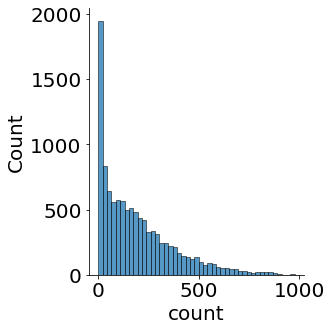

In [15]:
mpl.rc('font', size = 20)
sns.displot(train['count'])

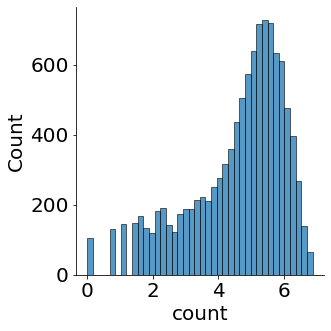

In [16]:
sns.displot(np.log(train['count']))

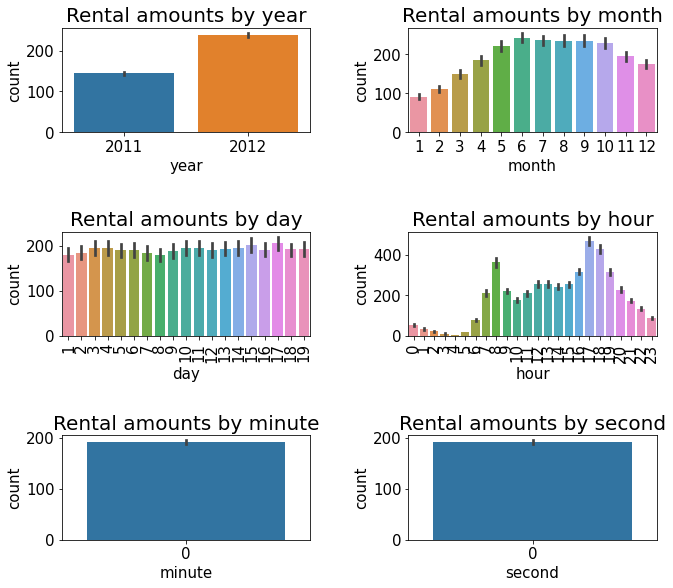

In [17]:
# Barplot: Count | Ordinal Data
# It seems that we observe P(Y|X), for example, when month is 7 then count has the mean on 210 and the distribution from 200 to 220.


mpl.rc('font', size=15)
mpl.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

i , j = 0, 0
for x in ['year', 'month', 'day', 'hour', 'minute', 'second']:
  sns.barplot(x = x, y = 'count', data = train, ax = axes[i//2, j%2])
  axes[i//2, j%2].set(title= f'Rental amounts by {x}')
  if i //2 == 1 :
    axes[i//2, j%2].tick_params(axis='x', labelrotation=90)
  i += 1 ; j += 1


# Day01 Closed.

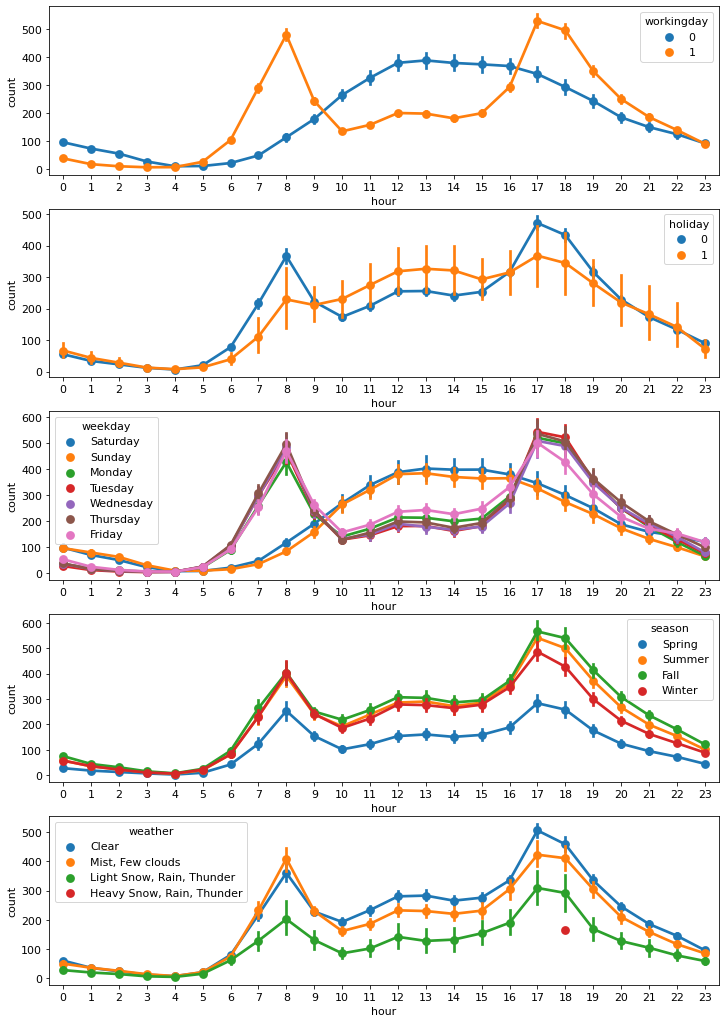

In [18]:
# Point Plot: Count | Numerical(Discrete)
## Step1: Make figures
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

## Step2: Draw Graphs
i = 0
for hue in ['workingday', 'holiday', 'weekday', 'season', 'weather']:
  sns.pointplot(x = 'hour', y= 'count', data = train, hue = hue, ax = axes[i])
  i += 1

# Interpretation P(Y|X1:working day, X2: hour)
## figure1: Working day, Rush hour / Holiday, Day time
## figure4: Isn't it outlier? Remove it or not -> testing

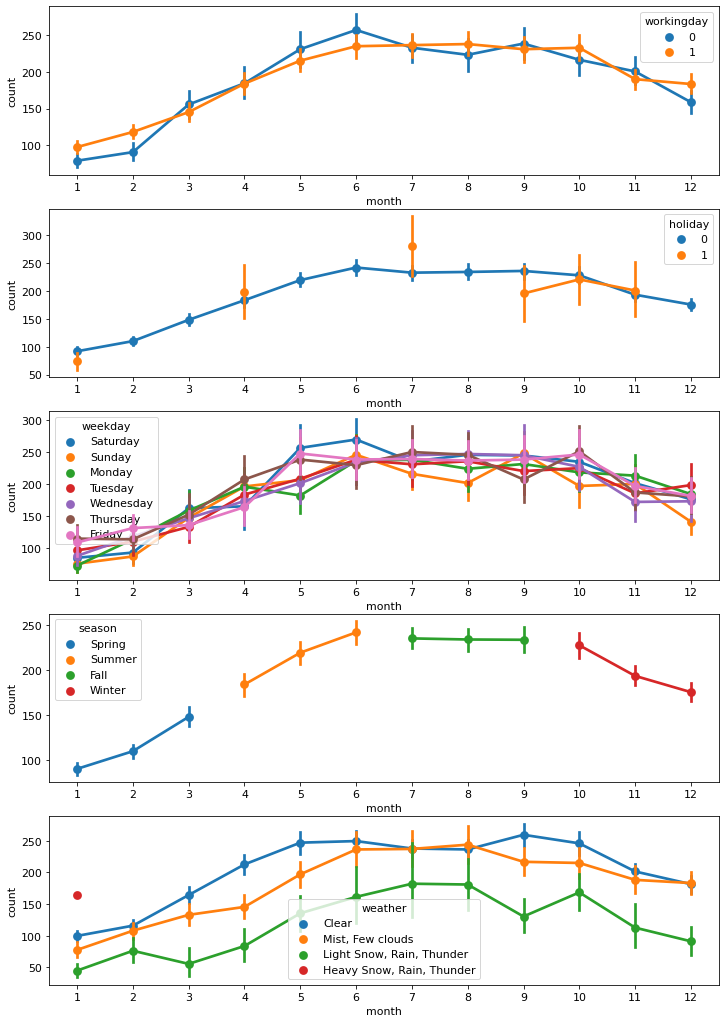

In [19]:
# Point Plot: Count | Categorical(Ordinal) Data
## Step1: Make figures
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

## Step2: Draw Graphs
i = 0
for hue in ['workingday', 'holiday', 'weekday', 'season', 'weather']:
  sns.pointplot(x = 'month', y= 'count', data = train, hue = hue, ax = axes[i])
  i += 1

# Interpretation P(Y|X1:working day, X2: hour)
## figure1: Working day, Rush hour / Holiday, Day time
## figure4: Isn't it outlier? Remove it or not -> testing

In [20]:
for i in range(0, 4):
  print(i//2, i%2)

0 0
0 1
1 0
1 1


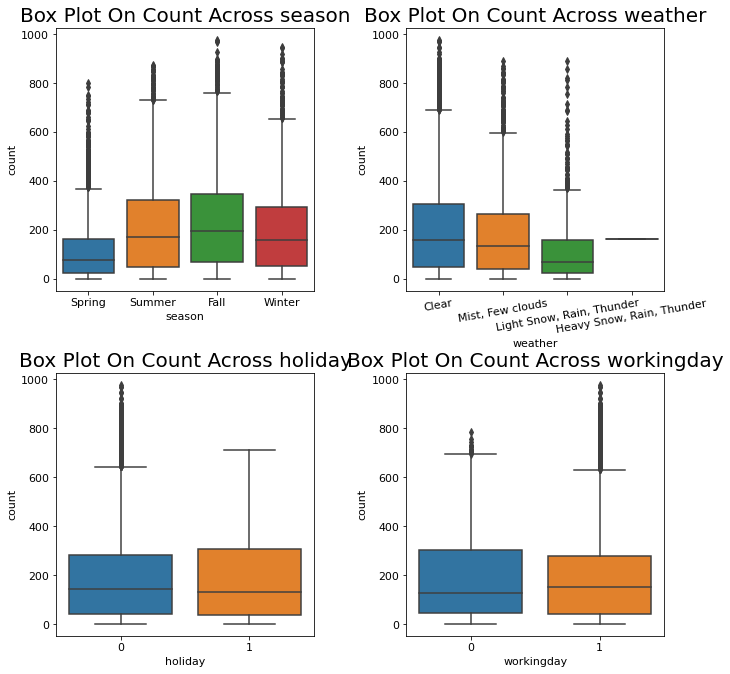

In [21]:
# Boxplot
# Count | Categorical(Nomial) Data

## Step1: make figures
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

## Step2: Draw Graphs
i = 0
for x in ['season', 'weather', 'holiday', 'workingday']:
  sns.boxplot(x=x, y='count', data=train, ax = axes[i//2, i%2])
  axes[i//2, i%2].set(title = f'Box Plot On Count Across {x}')
  i += 1

## Step3: Detail
axes[0,1].tick_params(axis='x', labelrotation=10)

# Interpretation
## Season: When Season is Fall, Count goes up
## Wheather: Matching on our instinction
## Holiday, Workingday: more or less same

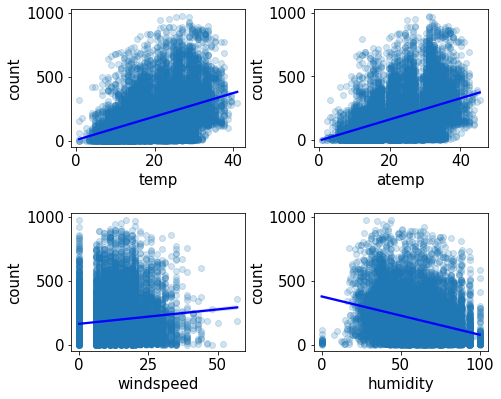

In [22]:
# Scatter plot with regression line: Count | Numerical Data
# Step1: Make Figures
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

# Step2: Draw Graphs
i = 0
for x in ['temp', 'atemp', 'windspeed', 'humidity']:
  sns.regplot(x = x, y = 'count', data = train, ax = axes[i//2,i%2], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
  i += 1
# Interpretation: temp, atemp, humidity features make same conclusion with our instinction, but windspeed doesn't. Because it has a lot of null data. So that We Remove this feature.

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

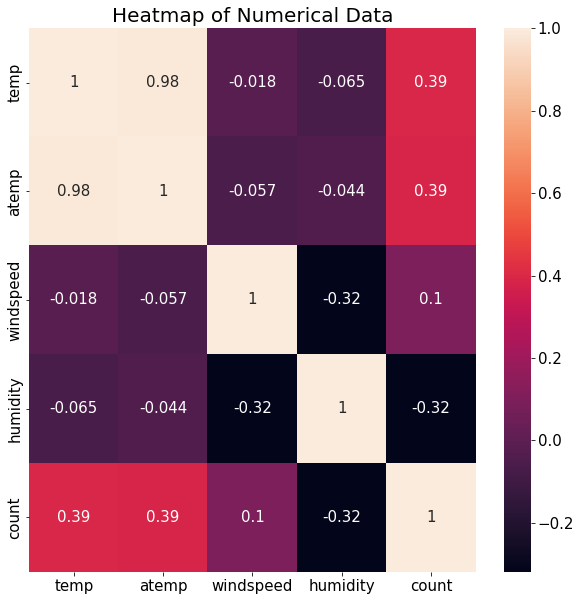

In [23]:
# Correlation: Numerical Data
numerical_columns = ['temp', 'atemp', 'windspeed', 'humidity', 'count' ]
corrMat = train[numerical_columns].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot = True)
ax.set(title = 'Heatmap of Numerical Data')

# Interpretation: On the line of count, We can see the corr between Y and X's. On the other hand, We can observe multicorrlinearity between X's on the Other lines.

- Conclusions
  - Taget Transformation
  - Feature Engineering: Datetime → year, month, day, hour, weekday ... 
  - Feature Removing: day(train: 0 ~ 19, test: 20 ~ 31), month(too much specified)

- Day2 Closed.

# Preperation for Modeling

## Import Data

In [24]:
# BaseLine Process: Import Data → FE → Scoring Function → Train Model → Test Score
# Merged Data(Train + Test): apply FE → Split Train Test

In [25]:
train = pd.read_csv(data_path  + 'train.csv')
test = pd.read_csv(data_path  + 'test.csv')
submission = pd.read_csv(data_path  + 'sampleSubmission.csv')

# Feature Engineering

In [26]:
# eliminate outlier
train = train[train['weather']!=4]

# Data Merge
all_data = pd.concat([train, test], ignore_index = True)

# FE after Data Merge
temp_date = pd.to_datetime(all_data['datetime'])

all_data['date'] = temp_date.dt.date
all_data['year'] = temp_date.dt.year
all_data['month'] = temp_date.dt.month
all_data['hour'] = temp_date.dt.hour
all_data['weekday'] = temp_date.dt.weekday

In [27]:
# Feature Selection: Considering EDA, Feature Importance, Corr Mat, ...
drop_features = [
    'casual'         #NaN in test data
    , 'registered'   #NaN in test data
    , 'datetime'     #Just Index
    , 'date'         #Information Also in year, month
    , 'windspeed'    #Low Corr
    , 'month'        #Season is Larger group for month
]

all_data.drop(drop_features, axis=1, inplace=True)

### Data Split

In [28]:
X_train = all_data[~pd. isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

y_train = train['count']
X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

In [29]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


### Scoring Function

$$RMSLE = \sqrt{ \frac{1}{N} \sum^N_{i=1}(\log(y_i+1)-\log(\hat{y_i}+1))^2}$$

In [30]:
def rmsle(y_true, y_pred, convert_exp = True):
  # Convert Exponential
  if convert_exp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
  
  #Log Transformation, followed by changing null to 0
  log_true = np.nan_to_num(np.log(y_true+1)) #np.log(y_true+1) == np.log1p(y)
  log_pred = np.nan_to_num(np.log(y_pred+1))

  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

# Base Line

### Model Generation

In [31]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

## Fitting & Evaluation

In [32]:
log_y = np.log(y_train)
linear_reg_model.fit(X_train, log_y)
pred = linear_reg_model.predict(X_train)
print(f' RMSLE of Linear Regression: {rmsle(log_y, pred, True):.4f}')

# Notice: We didn't use validation here. Right Process is like, Using Train Data for Training AND Validation Data for evaludate Model. (In the Next Chapter)

 RMSLE of Linear Regression: 1.0205


In [33]:
linearreg_preds = linear_reg_model.predict(X_test)
submission['count'] = np.exp(linearreg_preds)
submission.to_csv('submission.csv', index = False)

- Day3 Closed. 
 - We learned the base process of modeling so that we can focus on problem solving not on endeavor to struggling with base process!

# Modified Model
- Base Line Model: Import Data → FE → Scoring Function → Train Model → Test Score
- Modified Model: Import Data → FE → Scoring Function → Train Model with **Optimizing Hyper Parameter** → Test Score → FE or Train Model Again
  - **Make a Model Instance → Make a Grid Search Object → Train Model(Grid Search)**
  - By Cross Validation

## Model Generation

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# 1. Model
ridge_model = Ridge()

## Grid Search Object

In [37]:
# Grid Search: Changing HyperParameter(2), Evaluates(3) each Model(1) with CV(4:1+2+3)

# 2. params
ridge_params = {
    'max_iter':[3000] # Maximum number of iterations for conjugate gradient solver.
    , 'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]
    }

# 3. scorer
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 4:1+2+3. CV Object
gridsearch_ridge_model = GridSearchCV(
    estimator = ridge_model
    , param_grid = ridge_params
    , scoring = rmsle_scorer # accuracy, f1, roc_auc, recall, ...
    , cv = 5
)

In [40]:
log_y = np.log(y_train)
gridsearch_ridge_model.fit(X_train, log_y)
# best_params_, best_estimator_
print('best parameters:', gridsearch_ridge_model.best_params_)

best parameters: {'alpha': 0.1, 'max_iter': 3000}


In [41]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
print(f'RMSLE value of Ridge Reg: {rmsle(log_y, preds, True):.4f}')

RMSLE value of Ridge Reg: 1.0205


- Day 4 Closed.
  - We did train modified model with Cross Validation, where we made a model, params, scroe function and CV object. And We fitted cv, so that we get best trained params and model.